In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#read dataset
df = pd.read_csv('/kaggle/input/tsla-prediction/tsla.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [ ]:
#split data into train & test
#train = 80%
#test = 20%
train_size = int(len(df) * 0.80) #1486
print(train_size)

1486


In [ ]:
train_data = df[0: train_size]

In [ ]:
train_data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1481,2016-05-17,209.05,209.82,204.02,204.66,2303002,0
1482,2016-05-18,209.15,215.31,207.75,211.17,4454848,0
1483,2016-05-19,213.62,216.79,207.30,215.21,6582419,0
1484,2016-05-20,216.99,220.55,216.35,220.28,8635216,0
1485,2016-05-23,219.87,222.60,215.86,216.22,4335487,0


In [ ]:
data_length = len(df)
data_length

1858

In [ ]:
test_data = df[train_size:data_length] #372 ---> 1486 : 1857

In [ ]:
len(test_data)

372

In [ ]:
test_data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [ ]:
#scaling data
scaler = MinMaxScaler()

In [ ]:
train_array = train_data.loc[:, ['Open']].values

In [ ]:
train_array

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [ ]:
test_array = test_data.loc[:, ['Open']].values

In [ ]:
train_scaled = scaler.fit_transform(train_array)

In [ ]:
len(train_scaled)

1486

In [ ]:
time_step = 40
x_train = [] #sequence of data points
y_train = [] #target values (next time step)

for i in range(time_step, len(train_scaled)):
    x_train.append(train_scaled[i - time_step:i, 0]) #1486 / 40
    y_train.append(train_scaled[i,0]) #1486

In [ ]:
#return x_train, y_train ---> numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train.shape

(1446, 40)

In [ ]:
y_train.shape

(1446,)

In [ ]:
#reshape x_train data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1446, 40, 1)

In [ ]:
#build RNN Model
rnn_model = Sequential()

#add simple RNN Layer with tanh activation, with input shape
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True,
                      input_shape = (x_train.shape[1], 1)))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add simple RNN Layer with tanh activation, with input shape
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add simple RNN Layer
rnn_model.add(SimpleRNN(50))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add output layer
rnn_model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile model
rnn_model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

In [ ]:
#fit model
rnn_model.fit(x_train, y_train, epochs = 30)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: 0.2207
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0847
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0516
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0321
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0240
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0232
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0102
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087
Epoch 13/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082
Epoch 14/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072
Epoch 15/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0075
Ep

In [ ]:
#model testing
total_data = pd.concat((df['Open'], test_data['Open']), axis = 0)

In [ ]:
total_data.head()

0    17.00
1    19.00
2    25.79
3    25.00
4    23.00
Name: Open, dtype: float64

In [ ]:
len(total_data)

2230

In [ ]:
inputs = total_data[len(total_data) - len(test_data) - time_step:].values.reshape(-1,1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
inputs.shape

(412, 1)

In [ ]:
x_test = []
for i in range(time_step, 412):
    x_test.append(inputs[i - time_step:i -0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test.shape

(372, 40, 1)

In [ ]:
rnn_prediction = rnn_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [ ]:
#inverse scaling
rnn_prediction = scaler.inverse_transform(rnn_prediction)
rnn_prediction

array([[294.18137],
       [264.16766],
       [243.78856],
       [238.26779],
       [237.13113],
       [239.44707],
       [235.17387],
       [233.77715],
       [228.00626],
       [229.7881 ],
       [232.62132],
       [237.50887],
       [238.99434],
       [237.4148 ],
       [234.42102],
       [231.0391 ],
       [235.21333],
       [230.09222],
       [230.22191],
       [231.26976],
       [231.19061],
       [223.70041],
       [218.58127],
       [215.63724],
       [206.87688],
       [210.31982],
       [215.49944],
       [219.15674],
       [218.42848],
       [218.33151],
       [219.95032],
       [219.62344],
       [225.901  ],
       [228.2529 ],
       [231.14696],
       [233.92343],
       [234.9145 ],
       [233.79709],
       [233.73705],
       [236.28839],
       [236.82594],
       [237.81929],
       [236.38518],
       [236.31303],
       [236.47348],
       [238.65259],
       [239.84569],
       [240.59473],
       [242.43362],
       [241.02463],


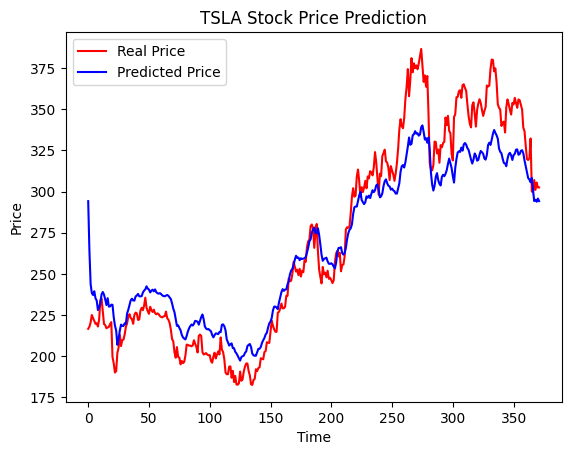

In [ ]:
plt.plot(test_array, color = 'red', label = 'Real Price')
plt.plot(rnn_prediction, color = 'blue', label = 'Predicted Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#LSTM Model
lstm_model = Sequential()
#add LSTM LAyer with input shape
lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True,
                    input_shape = (x_train.shape[1], 1)))

#add droput layer
lstm_model.add(Dropout(0.2))

#add LSTM LAyer with input shape
lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True))

#add droput layer
lstm_model.add(Dropout(0.2))

#add LSTM LAyer with input shape
lstm_model.add(LSTM(50))

#add droput layer
lstm_model.add(Dropout(0.2))

#add output layer
lstm_model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile model
lstm_model.compile(optimizer = 'adam',
                  loss = 'mean_squared_error')

In [ ]:
#fit model
lstm_model.f وعit(x_train, y_train, epochs = 30)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0718
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033
Epoch 13/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 14/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048
Epoch 15/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037
Epoch 16/30
46/46 ━

In [ ]:
lstm_prediction = lstm_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
#inverse scaler
lstm_prediction = scaler.inverse_transform(lstm_prediction)

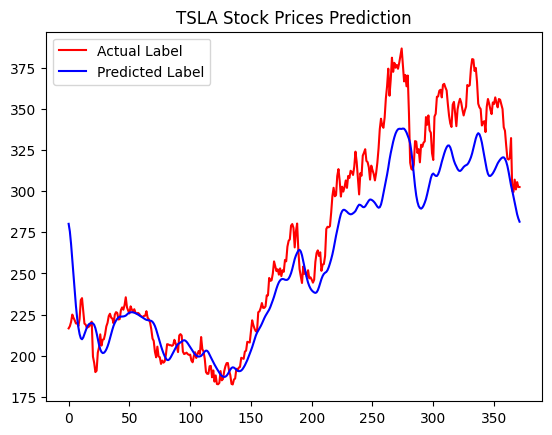

In [ ]:
plt.plot(test_array, color = 'red', label = 'Actual Label')
plt.plot(lstm_prediction, color = 'blue', label = 'Predicted Label')
plt.title("TSLA Stock Prices Prediction")
plt.legend()
plt.show()

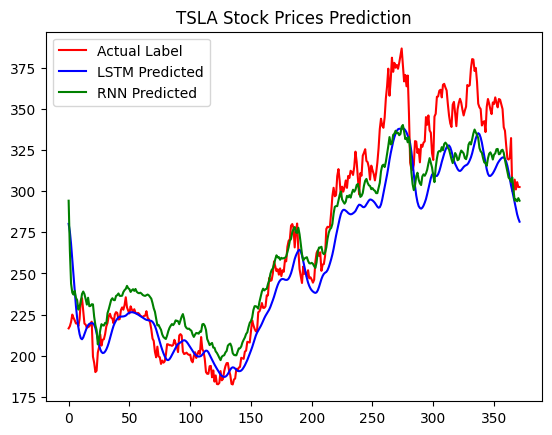

In [ ]:
plt.plot(test_array, color = 'red', label = 'Actual Label')
plt.plot(lstm_prediction, color = 'blue', label = 'LSTM Predicted')
plt.plot(rnn_prediction, color = 'green', label = 'RNN Predicted')
plt.title("TSLA Stock Prices Prediction")
plt.legend()
plt.show()